# Multiple Testing, P-Hacking, Reproducibility Crisis, Publication Bias 

## Table of Contents:
1. [Background reading](#background-reading)
    
    
2. [Multiple Testing](#Multiple-Testing)
    
    2.1 [The Benjamini-Hochberg Procedure](#The-Benjamini-Hochberg-Procedure)
    
    2.2 [Paul the Octopus](#Paul-the-Octopus)
        

3. [Case Study 1](#Case-Study-1)
    
    3.1 [Case Study 1 Dataset](#Case-Study-1-Dataset)
        
    3.2 [Case Study 1 Code](#Case-Study-1-Code)
        
    3.3 [Summary and Conclusion of Case Study 1](#Summary-and-Conclusion-of-Case-Study-1)
        
        
        
4. [P-Hacking](#P-Hacking)
    
    
5. [Case Study 2](#Case-Study-2)
    
    5.1 [Case Study 2 Dataset](#Case-Study-2-Dataset)
        
    5.2 [Case Study 2 Code](#Case-Study-2-Code)
        
    5.3 [Summary and Conclusion of Case Study 2](#Summary-and-Conclusion-of-Case-Study-2)
        
        
        
6. [Reproducibility Crisis](#Reproducibility-Crisis)
    
    
7. [Publication Bias](#Publication-Bias)
    
    
8. [Data in Fabrics of Society](#Data-in-Fabrics-of-Society)
    
    8.1 [Publication Bias in Hedge Funds](#publication-bias-in-hedge-funds)

    8.2 [The Cost of Multiple Testing and P-Hacking](#the-cost-of-multiple-testing-and-p-hacking)

    8.3 [Other References](#other-references)

        



### Background reading:
*Intro to Statistical Learning*: Chapter 13 and Chapter 11 Section 5.4

*Ethical Algorithm*: Chapter 4

## Multiple Testing
As we have discussed in previous tutorials, multiple testing refers to performing statistical inference tests across many variables without accounting for the number of tests. While a p-value of 0.05 might be fine for one test, if you perform a hundred tests, you will end up with on average five false positive results! How can you correct for this phenomenon?

False discovery rate (FDR) is the ratio of the number of false positive results to the number of total positive test results, aka the expected proportion of type 1 errors. FDR is the essence of the multiple testing problem, which started to be recognized as an issue in the 90s and early 2000s with the rise of big data. 

Controlling for the FDR allows one to perform many hypothesis tests while accounting for the multiple testing problem. Instead of trying to avoid any false positives, the goal is just to make sure that the ratio of false positives to total positives is small enough. The choice of FDR threshold is very context-dependent; there is no widely accepted "right" threshold (like an alpha-level of 0.05 or 0.01). If the planned follow-up analysis is time-consuming or expensive, you might want to control the FDR at a threshold of 10%. Alternately, if you want to make sure you catch any potential significant factors and the follow-up analysis is inexpensive, an FDR threshold of 30% might be better.


### The Benjamini-Hochberg Procedure

Algorithm 13.2 from *An Introduction to Statistical Learning with Applications in R* by Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani describes the Benjamini-Hochberg procedure to control the FDR.

1. Specify q, the level at which to control the FDR.
2. Compute p-values, p1,...,pm, for the m null hypotheses H01,...,H0m.
3. Order the m p-values so that p(1) ≤ p(2) ≤ ··· ≤ p(m).
4. Define L = max{ j : p(j) < qj/m }. 
5. Reject all null hypotheses H0j for which pj ≤ p(L).

The Benjamini-Hochberg procedure rejects all null hypotheses for which the p-value is less than or equal to the Lth smallest p-value, where L is a function of all m p-values. When using this procedure, you can't plan in advance what the threshold will be, since it depends on the data collected. This procedure is a good method of correcting for the multiple testing problem while remaining relatively simple to understand and perform.

### Paul the Octopus

During the 2010 FIFA World Cup, a German octopus named Paul became famous for correctly "predicting" the outcome of every match Germany played, as well as the final match between the Netherlands and Spain. Paul’s owners at the Sea Life Centre in Oberhausen, Germany would put two food boxes in his tank, each labeled with the flag of one of the countries playing in the upcoming match. Whichever box Paul chose to eat from first was taken as his prediction for who would win.

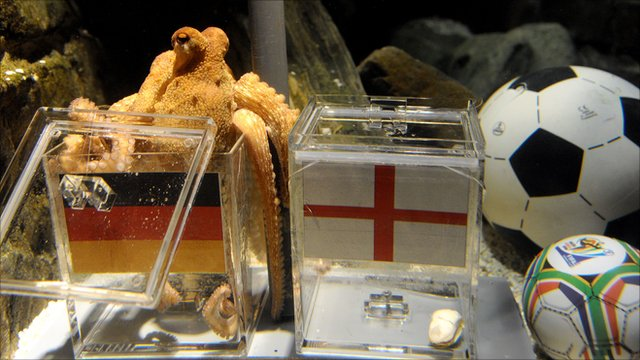

Assuming Paul was randomly guessing and had a 1/2 chance of picking the correct team each time, he only had a 1/256 chance of getting them all right, which comes out to p = 0.0039--way lower than the widely accepted alpha-level of 0.05. So how did this happen?

Turns out, there were many animals across the globe being asked to predict these matches, some of whom were even from the same zoo as Paul! When accounting for the number of animals participating (at least 12), the odds that at least one of them would predict correctly were closer to 9%, which is a decent chance. Studies are much more credible when they have been replicated. In cases like Paul's, where only one trial of one correctly predicting animal has been discovered, data scientists (and average people) should be highly skeptical. 

Read more about multiple testing here: https://www.samlau.me/test-textbook/ch/18/hyp_phacking.html

This comic is an another amusing illustration of the multiple testing problem:

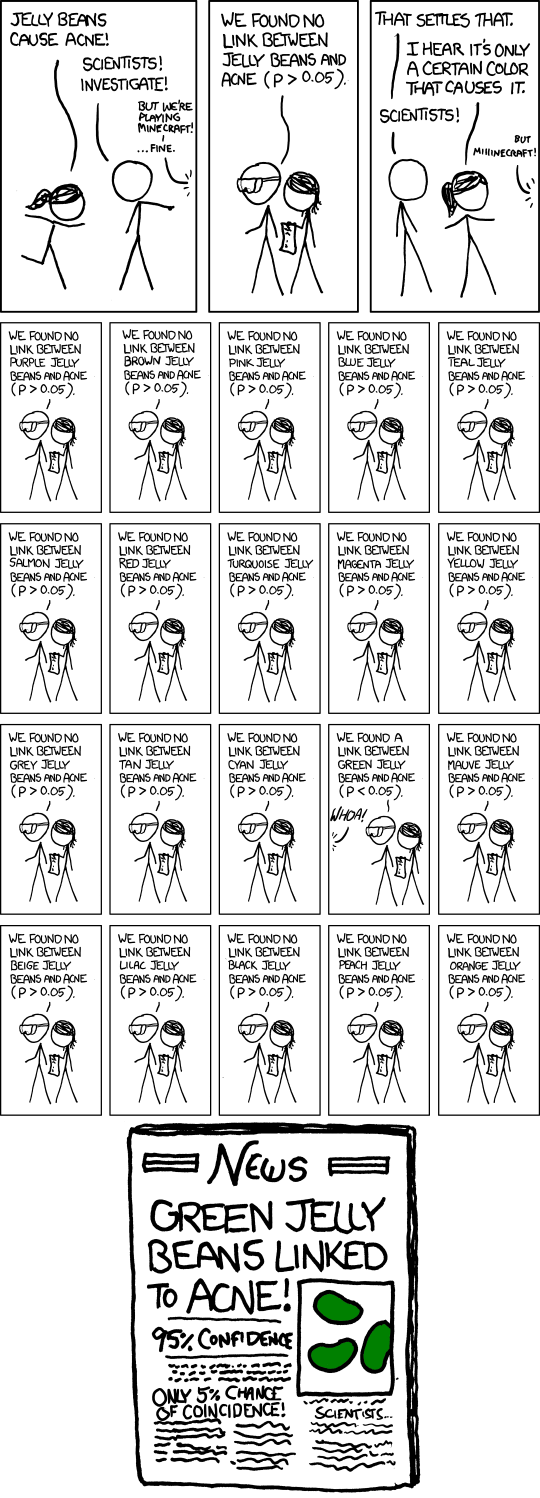

## Case Study 1 

### Case Study 1 Dataset:
Our case study uses the Cancer Statistics in US States database from the following Kaggle Link:
https://www.kaggle.com/datasets/nancyalaswad90/cancer-statistics-in-us-states
    
This dataset contains information about 272 patients and 1555 gene expression levels.

Attribute columns:
1. Patient
2. ID
3. Age
4. eventdeath: represents whether the patient died after treatment (0: alive; 1: dead).
5. survival: survival time (year)
6. time recurrence: time interval when cancer cells reappear

7-17.tumor related information

18-1573. gene expression levels

Different gene expression levels may affect the therapeutic effect of breast cancer and the ability of patients to repair themselves. Therefore, detecting the patient's key genes is helpful to select appropriate treatment methods and speculate on the physical condition during the rehabilitation period. This project aims to identify genes that have an important impact on the death of breast cancer patients.

### Case Study 1 Code

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
!pip install yellowbrick
import yellowbrick as yb

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# load in dataset
data_raw = pd.read_csv("../../../data/gene and breast cancer.csv")

In [3]:
# subset data (without uninterpretable features)
features_to_drop = data_raw.columns[16:]
data_subset = data_raw.drop(features_to_drop, axis=1)

In [4]:
# data splitting
X = data_subset.drop(['Patient', 'ID'], axis=1)
y = data_subset['eventdeath']

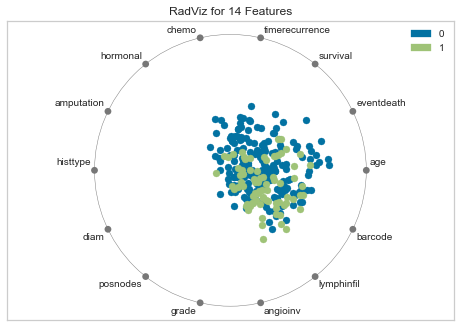

<AxesSubplot:title={'center':'RadViz for 14 Features'}>

In [5]:
# visualise class separation
from yellowbrick.features.rankd import Rank2D 
from yellowbrick.features.radviz import RadViz 
from yellowbrick.features.pcoords import ParallelCoordinates 

classes = ['alive', 'dead']
features = X.columns
visualizer = RadViz(clases=classes, features=features)

X_matrix = X.values
y_matrix = y.values

visualizer.fit(X_matrix, y_matrix)
visualizer.transform(X_matrix)
visualizer.poof()

In [6]:
import numpy as np
from scipy import stats
#Define T-test Function
def get_p_value(arrA, arrB):
    a = np.array(arrA)
    b = np.array(arrB)
    t, p = stats.ttest_ind(a,b)
    return p

In [7]:
#Delete the none gene column
data_subset = data_raw.drop(data_raw.columns[0:3], axis=1)
data = data_subset.drop(data_subset.columns[1:13], axis=1)

In [8]:
#Subset 2 Groups: alive vs Dead
group1 = data[data['eventdeath']==0]
group2 = data[data['eventdeath']==1]

In [9]:
#Group alive(experimental group)
group1 

,eventdeath,esr1,G3PDH_570,Contig45645_RC,Contig44916_RC,D25272,J00129,Contig29982_RC,Contig56678_RC,Contig53047_RC,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
0,0,-0.413955,-0.954246,0.051024,-0.111203,-0.050066,-0.340897,-0.038770,-0.104256,-0.485671,...,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795
1,0,0.195251,0.244626,-0.199602,-0.111397,-0.135207,0.026813,-0.165675,0.081549,-0.736914,...,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098
2,0,0.596177,0.082434,-0.156199,-0.084980,-0.179003,-0.490377,-0.193691,0.186532,-0.801328,...,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911
3,0,0.501286,-1.071614,-0.206041,-0.051775,-0.049676,-0.306176,0.061596,0.115982,-0.842997,...,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710
4,0,-0.066771,-0.982276,-0.514666,-0.118483,-0.086523,-0.377659,-0.093353,0.302795,-0.794573,...,-0.287538,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,0,0.028529,-0.090567,0.256663,-0.041125,-0.092834,-0.474358,-0.118984,0.329569,-1.036076,...,0.147697,0.227700,0.090535,1.000566,0.779594,-0.162223,0.305657,-0.442641,0.555740,-2.000000
257,0,-0.668578,-0.338592,0.273382,-0.124589,-0.339998,-0.749183,0.699458,-0.017609,-0.007375,...,-0.441967,0.006551,0.316395,-0.637906,-0.069631,0.060068,0.225796,-0.124786,0.229171,0.685029
258,0,0.103277,0.344865,0.176639,0.032754,0.010277,-0.522925,0.133981,-0.025583,-0.919510,...,0.449274,-0.168471,-0.278460,-0.890538,-0.171537,-0.071576,0.439395,-0.009709,-0.103687,0.132981
259,0,0.151225,0.105022,-0.317163,-0.070794,-0.063028,-0.999994,0.034760,-0.423690,-0.918932,...,0.317445,0.147497,0.161791,-0.620431,-0.633501,-0.221917,-0.095078,-0.593263,-0.260761,0.046835


In [10]:
#Group dead(control group)
group2

,eventdeath,esr1,G3PDH_570,Contig45645_RC,Contig44916_RC,D25272,J00129,Contig29982_RC,Contig56678_RC,Contig53047_RC,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
9,1,-1.324176,-0.104224,-0.427800,-0.003295,-0.060694,-0.253229,-0.165621,-1.110337,-0.726393,...,-0.845758,0.635155,-0.235659,-0.396895,-0.474251,-0.298208,-0.531806,0.091948,-0.605779,-0.607580
12,1,-0.162349,0.190224,0.157729,-0.110239,-0.022853,0.061682,0.468902,-0.226406,-0.237759,...,0.115984,-0.364999,0.055677,-0.631157,0.231151,-0.058433,0.080366,-0.285472,-0.238604,0.370100
14,1,-0.661729,0.096640,-0.258875,-0.105883,-0.178748,0.368888,-0.255147,-0.518845,-0.928234,...,0.486894,-0.307986,-0.019385,-0.074633,-0.262925,-0.032161,-0.337821,0.257535,0.385928,-0.755791
16,1,-0.435775,-0.799154,0.081538,-0.013132,0.034742,-0.504213,-0.048261,-0.272853,-0.514442,...,0.340210,0.209754,0.011824,-0.087450,-0.167448,-0.015781,0.234903,-0.003074,-0.404941,-0.182364
19,1,-1.255379,-0.006519,-0.201504,-0.120400,-0.077757,1.050243,0.018297,-0.534194,-0.737589,...,0.148252,0.026755,0.143584,-0.766902,-0.022762,-0.019199,0.121523,0.162393,-0.893341,0.334673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1,-1.235442,-1.685581,-0.164630,0.154430,0.101913,-0.601388,-0.176571,-0.523702,-0.834471,...,-0.695745,-0.076025,0.201054,-0.108361,0.222534,-0.471391,0.026301,0.476758,-0.468408,-0.843889
268,1,0.062265,-0.291542,-0.211872,-0.010131,0.012644,-0.510967,-0.207124,0.484805,-0.665009,...,-0.743322,0.108220,0.083472,-0.859677,-0.551512,-0.191424,-0.844488,-0.357929,-0.585760,0.169989
269,1,-0.635322,-0.413171,0.839933,0.040242,0.117469,-0.445968,1.312026,-0.057602,-0.607955,...,-0.778710,0.251779,-0.063160,0.450576,0.452686,1.055764,0.591880,-0.510884,0.251903,-0.822792
270,1,-1.055801,0.068256,0.036255,-0.014642,0.135658,-0.569357,-0.146483,-0.663936,1.003547,...,-0.614775,-0.417394,-0.077948,-0.126006,-0.841332,-0.274742,-0.063019,-0.396531,0.356816,0.345088


In [11]:
#
mean1=group1.iloc[0:195,1:1554].mean()
mean2=group2.iloc[0:77,1:1554].mean()

In [12]:
mean1

esr1             -0.144011
G3PDH_570        -0.026602
Contig45645_RC   -0.022899
Contig44916_RC   -0.013676
D25272            0.059860
                    ...   
NM_000860        -0.091100
Contig29014_RC   -0.012376
Contig46616_RC   -0.038249
NM_000888        -0.047795
NM_000898        -0.218039
Length: 1553, dtype: float64

In [13]:
mean2

esr1             -0.529167
G3PDH_570        -0.021488
Contig45645_RC   -0.090801
Contig44916_RC   -0.032987
D25272           -0.020858
                    ...   
NM_000860        -0.180245
Contig29014_RC   -0.022143
Contig46616_RC   -0.105271
NM_000888        -0.014753
NM_000898        -0.297087
Length: 1553, dtype: float64

In [14]:
import scipy
statistic, pvalue = scipy.stats.ttest_ind(group1,group2)

In [15]:
pvalue

array([0.00000000e+00, 1.67358746e-07, 9.51774042e-01, ...,
       3.19231121e-01, 2.23770690e-01, 4.88799369e-01])

In [16]:
from statsmodels.stats.multitest import multipletests
multipletest = multipletests(pvalue,alpha=0.05, method='bonferroni')
TF = multipletest[0]
ADpvalue = multipletest[1]

In [17]:
ADpvalue 

array([0.0000000e+00, 2.6024285e-04, 1.0000000e+00, ..., 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00])

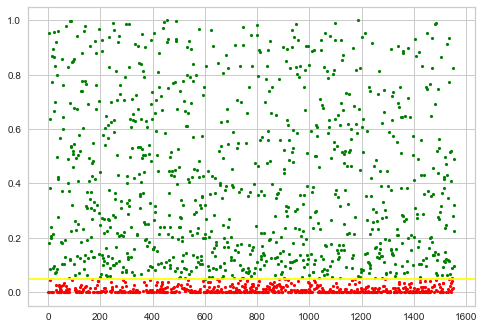

In [18]:
import matplotlib.pyplot as plt
import numpy as np
x=list(range(1,len(pvalue)+1))
col =[]
count = 0
g ={1: 'red', 2: 'blue', 3: 'green'}
for i in range(0, len(pvalue)):
    if pvalue[i]<0.05:
        col.append('red')
        count+=1
    else:
        col.append('green') 
  
for i in range(len(pvalue)):
    plt.scatter(x[i], pvalue[i], c = col[i], s = 10,
                linewidth = 0)
plt.axhline(y=0.05, color='yellow', linestyle='-')

In [19]:
print("There are %d gene that significantly affect the death of breast cancer patiences"%(count))

There are 607 gene that significantly affect the death of breast cancer patiences


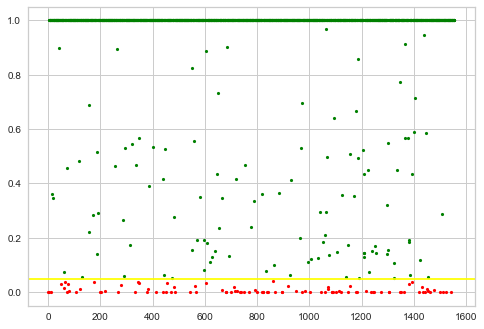

In [20]:
x=list(range(1,len(ADpvalue)+1))
col =[]
count = 0
for i in range(0, len(TF)):
    if TF[i]== True:
        col.append('red')
        count+=1
    else:
        col.append('green') 
  
for i in range(len(ADpvalue)):
    plt.scatter(x[i], ADpvalue[i], c = col[i], s = 10,
                linewidth = 0)
plt.axhline(y=0.05, color='yellow', linestyle='-')

In [21]:
print("There are %d gene that significantly affect the death of breast cancer patiences"%(count))

There are 98 gene that significantly affect the death of breast cancer patiences


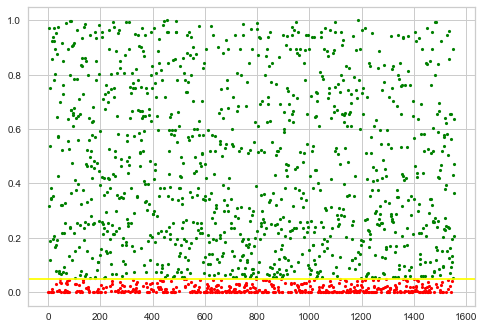

In [22]:
from statsmodels.stats.multitest import multipletests
multipletest = multipletests(pvalue,alpha=0.05, method='fdr_bh')
TF = multipletest[0]
ADpvalue = multipletest[1]
x=list(range(1,len(ADpvalue)+1))
col =[]
count = 0
for i in range(0, len(TF)):
    if TF[i]== True:
        col.append('red')
        count+=1
    else:
        col.append('green') 
  
for i in range(len(ADpvalue)):
    plt.scatter(x[i], ADpvalue[i], c = col[i], s = 10,
                linewidth = 0)
plt.axhline(y=0.05, color='yellow', linestyle='-')

In [23]:
print("There are %d gene that significantly affect the death of breast cancer patiences"%(count))

There are 443 gene that significantly affect the death of breast cancer patiences


### Summary and Conclusion of Case Study 1

It is easy to obtain a large number of false positive results by comparing multiple genes of the same group of patients. As shown in case study 1, if 1555 genes are tested without adjustment, we will finally get 607 positive results. Obviously, there are a lot of false positives among them, because the expression of many genes affects each other. Therefore, we adopted the Bonferroni adjustment, and finally reduced the number of possible genes to 96 by using the Bonferroni adjustment and 443 by using the Benjamini-Hochberg Procedure.

## P-Hacking
P-hacking is a term that refers to performing statistical analysis in a way that makes non-significant data relationships appear significant. 

Many people are under the impression that researchers performing p-hacking are doing so intentionally, trying out many analysis methods in sequence and unscrupulously fishing for statistically significant findings so that they can get published. But this is not always the case--not every researcher who is p-hacking is even aware that they are doing so.  There are many different valid ways to perform statistical anaylsis, and it is easy to justify your choices in hindsight. P-hacking can occur due to human error and subconcious bias and is not necessarily an calculated misrepresentation of the data on the part of researchers. 

See this NPR article about p-hacking: https://www.npr.org/sections/13.7/2014/06/02/318212713/science-trust-and-psychology-in-crisis

Below are some of the most common p-hacking strategies: 
 - Selective reporting of the dependent variable
 - Selective reporting of the independent variable
 - Optional stopping, aka data peeking (when a researcher repeatedly computes a hypothesis test as data points are collected, and stops collecting data once they achieve a significant result)
 - Outlier exclusion, which reduces the standard deviation of a data pool
 - Exploiting alternative hypothesis tests (adding or relaxing assumptions, or changing parametrization of the model)

To read more about other p-hacking strategies, check out this research paper, Big Little Lies, A Compendium and Simulation of p-Hacking Strategies: https://psyarxiv.com/xy2dk/
    
There are steps that can be taken to protect against p-hacking. The biggest one that has gained steam over the past decade or two is known as "pre-registration" of studies. Detailed plans on how data will be analyzed are created in advance of the data collection, that way researchers are forced to follow their earlier decisions. This prevents them from being able to try out different collection and analysis methods in order to find an artificially significant result. 

See this article on preventing p-hacking: https://analyticsindiamag.com/what-is-p-hacking-how-to-avoid-it/

The image below represents how laypersons, and even some experts, often evaluate whether a study has significant findings based solely on the p-value. They do not consider the other steps taken that contribute to that p-value. Just because p < 0.05 does not mean that the results are necessarily true. 

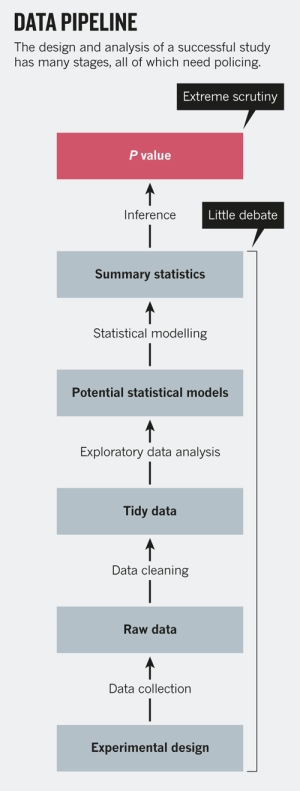


### Case Study 2 Dataset:
Our second coding example is a thought experiment using a dataset of randomly generated numbers which represent student's final exam grades in math classes at Pitt.

This dataset contains information about 1000 students' fictitious final exam grades.

Attribute columns:
1. grade

Imagine that students at Pitt have complained that the departmental finals for math courses are too hard and cause too many students to fail. You are the department chair, and you want to find evidence to disprove this claim, as you are a proponent of the current system and don't want to have to change it. So, you decide to go to the engineering students, as they are known to have good math scores. You will take a sample of them to analyze, to prove that there is no issue with students being able to succeed on math finals. 

### Case Study 2 Code

In [24]:
# load in dataset
import pandas as pd
fake_grades = pd.read_csv("../../../data/FakeGradesDataset.csv")
display(fake_grades)

,Grades
0,34
1,23
2,23
3,82
4,30
...,...
995,35
996,56
997,59
998,63


In [25]:
#narrow it down to engineering students, who have naturally scored above 60 on their final exams 
#this is due to both the one-letter-grade rule and the minimum "C" grade rule for the engineering school
engineering_grades = fake_grades[fake_grades.Grades >= 60]
display(engineering_grades)

,Grades
3,82
7,75
15,91
17,85
18,89
...,...
988,66
989,93
991,97
992,86


In [26]:
#take a random sample of 50 of these engineering students
sample_engr_grades = engineering_grades.sample(n=50)
sample_engr_grades.head()

,Grades
696,86
161,68
708,63
366,93
455,73


In [27]:
#look at mean and standard deviation of the sample
display(sample_engr_grades["Grades"].mean())
display(sample_engr_grades["Grades"].std())

81.22

10.75381280271878

In [28]:
#perform a z-test on the sample to see if the average sampled student fails the final
from statsmodels.stats.weightstats import ztest as ztest
ztest(sample_engr_grades["Grades"], value=60)

(13.953010129565413, 3.016024334439347e-44)

### Summary and Conclusion of Case Study 2
With such a small p-value (1.8180935253415537e-35), you can easily reject your null hypothesis and claim that there is no way too many students are failing the final exam. After all, based on your sample, there is statistically no way the mean final exam score is below 60% (a failing grade). You are pleased with your analysis.

In reality, the "grades" are just random numbers between 0 and 100, so the true population mean is close to 50. If these were real final exam grades, students would absolutely be justified in complaining. Obviously this thought experiment is an extreme example; nothing like this would ever happen on a legitimate research team. But still, this shows that just like the in the diagram above, a low p-value does NOT signify a good finding if the steps taken to get there are dubious at best.

## Reproducibility Crisis

The reproducibility crisis is a phenomenon discovered in recent years, where the results of many reputable scientific studies using widely accepted experimental methods are difficult or even impossible to reproduce. This calls into question the credibility of those studies, because if the results cannot be replicated, the study's findings may be based on random chance and not a true cause-and-effect relationship. 

See the following brief article from the American Psychological Association: https://www.apa.org/monitor/2015/10/share-reproducibility

The explanantion behind this crisis is that it is mostly due to publication bias and low-power studies. Publication bias will be explained in more detail below. 

The term "low-power studies" refers to the statistical power of the hypothesis test. Statistical power is the probability that a hypothesis test correctly rejects a false null hypothesis. It is inversely related to the probability of a type II error (Power = 1 – β). The power of the test depends on three factors, *effect size* (difference between two or more treatments), *sample size*, and *variability* of the sample. The larger the effect size and sample size, and the smaller the variability, the less likely it is that the results of the study are due to random chance. 

Low-power studies have a high risk of a type II error, that is, a high chance of incorrectly failing to reject the null when it actually is false. That means that extreme values are required in order to trigger a statistically significant finding in the study. So, when a statistically significant finding *is* made, it may appear to have a bigger effect size than the true difference between the groups. A statistical power of 0.8 is seen as a good target value in order to eliminate this bias. 

For more information about the downsides of low-power hypothesis tests, see this explanation: https://statisticsbyjim.com/hypothesis-testing/low-power-studies/

The infographic below is from a recent survey (Baker, 2016) on reproducibility in research which surveyed 1,576 researchers. More than 70% of them had tried and failed to reproduce another scientist’s experiments, and more than half failed to reproduce their own experiments.

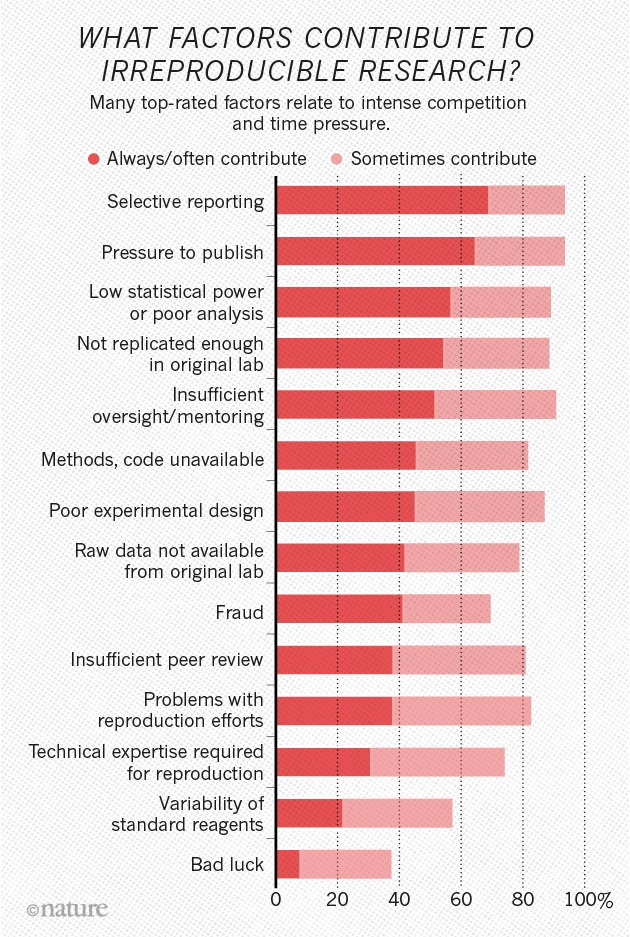

## Publication Bias

Publication bias is essentially the scientific version of "if it bleeds, it leads"--a saying in journalism which means sensational, violent stories are prioritized in the news, because they draw viewers' attention. Scientific journals are interested in publishing groundbreaking research and new discoveries, which affects the research papers they choose to accept. 

The biggest factors contributing to publication bias are as follows, according to an article from the NIH: 

    1. Rejection by journal editors and reviewers
    
    2. Lack of interest to revise the research paper
    
    3. Competing interests
    
    4. Lack of motivation to write a research paper
    
Many scientists will consider research with negative or neutral results a failure, which is not the case. As long as the methodology was sound, the findings are meaningful, even if it is not the outcome that the researcher was hoping for.

The two plots below show the results available from dozens of experiments designed to determine the size of a given effect. The upper plot represents the true distribution of findings around a mean effect size. The lower plot represents all findings present in literature, after publication bias has come into play. It is clear that in this example, the studies with more negative effects were not published in journals. Therefore, if you were an outsider making assumptions solely off of published research, you would likely conclude that the effect is greater than it truly is.

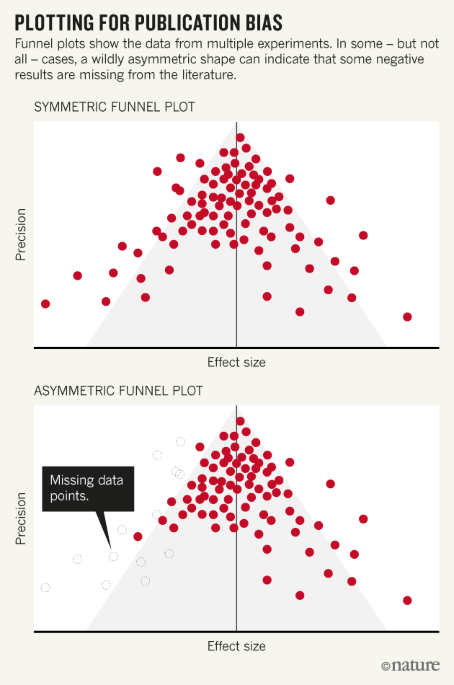

## Data in Fabrics of Society

### Publication Bias in Hedge Funds
Hedge funds in the United States are not very strictly regulated, especially when compared to investment banks and mutual
funds. They can choose to report their performance, but there is no law or rule requiring them to report. If they are doing well, they might voluntarily report their performance with the goal of attracting new investors. But when a fund is underperforming, it is obviously incentivized not to report these downturns. This results in publicly reported hedge fund performances that overestimate the true returns of the hedge funds. A 2012 study found that these hedge funds may be biased to the point of overestimating returns by 60%.

Aside from the publication bias issue, there is also a survivorship bias issue in hedge fund performance databases. The databases only supply information on funds that are still in operation, so if a fund was not doing well and was closed, it is not represented in the data. This further artificially inflates the performance of hedge funds as a whole. 

The following Forbes article about the downsides of hedge fund investing mentions this issue, among others: https://www.forbes.com/sites/ricksuarez/2011/06/27/why-i-avoid-investing-in-hedge-funds/?sh=776935d4387c

### The Cost of Multiple Testing and P-Hacking
Multiple testing and p-hacking can both lead to false discoveries, which are harmful and expensive. A 2015 study estimated that the monetary cost of irreproducible preclinical medical research was greater than 28 billion dollars per year at the time, or approximately 35.7 billion dollars today. This is on top of the scientific/ethical cost, as these false discoveries slow down the search for lifesaving cures by wasting medical researchers' time. False discoveries can also give baseless hope to patients waiting for breakthroughs that could save their lives. Being aware of these issues and taking steps to mitigate their effects is critical to avoiding a waste of time and resources and getting people's hopes up for nothing. 

This article discusses in more depth why so many clinical trials for pharmaceutical R&D fail and touches on many of the topics of this tutorial: https://www.forbes.com/sites/davidgrainger/2015/01/29/why-too-many-clinical-trials-fail-and-a-simple-solution-that-could-increase-returns-on-pharma-rd/?sh=132acc6edb8b

### Other References
Reproducibility Crisis Infographic: http://www.biobserve.com/behavioralresearch/reproducibility-in-behavioral-neuroscience-methods-matter/

Publication Bias Infographic: https://www.nature.com/articles/nature.2017.21728

Causes of Publication Bias Article: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6573059/#:~:text=Publication%20bias%20is%20defined%20as,strength%20of%20the%20study%20findings.

Data Pipeline Infographic: https://www.samlau.me/test-textbook/ch/18/hyp_phacking.html

Multiple Testing Comic: https://xkcd.com/882/

Inflation Calculator: https://www.bls.gov/data/inflation_calculator.htm

An Introduction to Statistical Learning with Applications in R, 2nd edition